In [1]:
#Tamim Mahmud from Daffodil International University
#13/07/2025
#Day 18
#This is Revision Part

In [7]:
from sklearn.neighbors import KNeighborsClassifier


# X = ফুলের মাপ (petal length, width)
X = [[1, 1], [2, 2], [3, 3], [6, 6], [7, 7], [8, 8]]
# y = জাত (0 = ছোট জাত, 1 = বড় জাত)
y = [0, 0, 0, 1, 1, 1]

model=KNeighborsClassifier()
model.fit(X,y)
model.predict([[5,5]])


array([1])

In [10]:
import numpy as np
X = np.array([
    [150, 50], [160, 55], [170, 60],  # Class 0 (shorter)
    [180, 75], [190, 80], [200, 90]   # Class 1 (taller)
])

# Labels: 0 = Short person, 1 = Tall person
y = np.array([0, 0, 0, 1, 1, 1])

model=KNeighborsClassifier()
model.fit(X,y)
model.predict([[198,56]])

array([1])

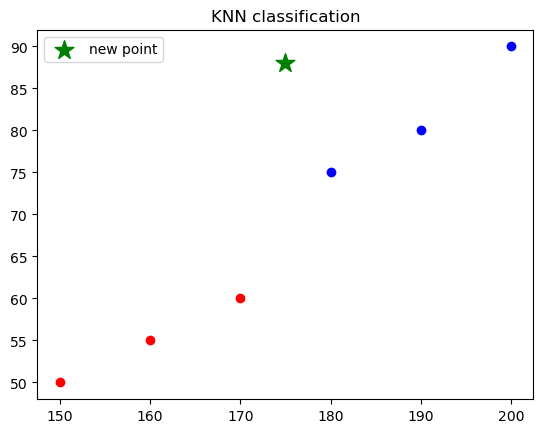

In [15]:
import matplotlib.pyplot as plt
for i in range(len(X)):
    color='red' if y[i]==0 else 'blue'
    plt.scatter(X[i][0],X[i][1],color=color)

plt.scatter(175,88,color='green',marker='*',s=200,label='new point')
plt.title("KNN classification")
plt.legend()
plt.show()

In [27]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report

data=load_breast_cancer()

X=data.data
y=data.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred))

Accuracy: 0.9473684210526315
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



 ✅ Accuracy: 0.9473684210526315 ≈ 94.74%

এই মানে:

    তোমার মডেল 114 জন টেস্ট ডেটার মধ্যে প্রায় 95% মানুষের ক্যান্সার ধরতে ঠিকভাবে পারছে (benign vs malignant)।

✅ ****Class 0 → Malignant (cancer detected)***

precision: 0.93 → মডেল যখন বলছে "tumor = malignant", তখন 93% ক্ষেত্রেই সঠিক বলেছে।
recall:    0.93 → সব malignant কেসের মধ্যে 93% ঠিকভাবে শনাক্ত করেছে।

f1-score:  0.93 → precision ও recall এর average।

support:   43   → total 43 জনের malignant ছিল।


 ✅ **Class 1 → Benign (no cancer)
 

precision: 0.96 → মডেল যখন বলছে "tumor = benign", তখন 96% ক্ষেত্রেই সঠিক বলেছে।

recall:    0.96 → সব benign কেসের মধ্যে 96% ঠিকভাবে শনাক্ত করেছে।

f1-score:  0.96 → precision ও recall এর average।

support:   71   → total 71 জনের benign ছিল।


✅ Macro Avg:


precision: 0.94 → দুই ক্লাসের precision এর average।

recall:    0.94 → দুই ক্লাসের recall এর average।

f1-score:  0.94 → দুই ক্লাসের f1-score এর average।


✅ Weighted Avg:


precision: 0.95 → সব ক্লাসের precision weighted average (support অনুযায়ী)।


recall:    0.95

f1-score:  0.95


    Weighted avg ক্লাসের instance সংখ্যা (support) অনুযায়ী average নেয়। এখানে class 1 বেশি ছিল (71 জন), তাই ওটার impact বেশি।

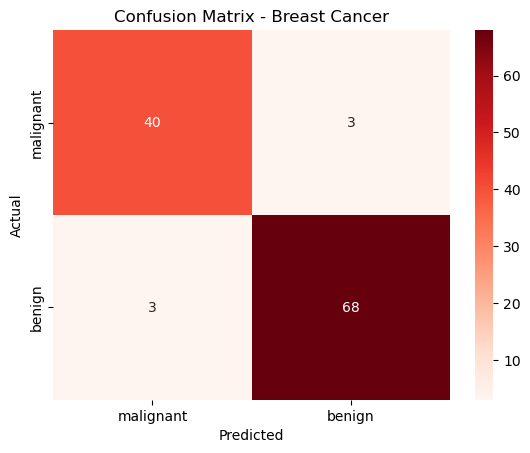

In [30]:
#confusion matrix for visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Breast Cancer")
plt.show()

In [31]:
#Now Kneighbors Regression

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# X = বয়স
X = [[5], [6], [7], [8], [9], [10]]
# y = উচ্চতা
y = [105, 115, 120, 130, 140, 150]

model=KNeighborsRegressor()
model.fit(X,y)
y_pred=model.predict([[4]])
print(y_pred)


[122.]


In [48]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor

data=fetch_california_housing()
X=data.data
y=data.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=KNeighborsRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred))
print("r2 score:",r2_score(y_test,y_pred))


MSE: 0.4324216146043236
r2 score: 0.6700101862970989


✳️MSE হিসাব করে predicted value ও actual value-এর পার্থক্যের স্কোয়ারের গড়।


মান যত কম হবে, তত ভালো।


মানে, predicted house price গুলো actual price থেকে কত দূরে আছে।